
Credit Card Customer Churn: Exploratory Data Analysis (EDA)

Author: Roy Lahav 

Dataset: `churn_cleaned.csv`

Objective
Explore and visualize key drivers of customer churn in the Bank Churners dataset.  
We’ll analyze demographic, behavioral, and financial factors that differentiate retained vs. attrited customers.

Key Questions
1. What is the overall churn rate?  
2. Which demographic groups are most likely to churn?  
3. How do financial behaviors (credit limit, utilization, transactions) differ for churned vs. retained customers?  
4. Which variables show strongest correlations with churn?

Tools
- Python: `pandas`, `numpy`, `matplotlib`


## 1) Setup & Load Data

In [26]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('churn_cleaned.csv')
print('Dataset shape:', df.shape)
df.head()


Dataset shape: (10127, 42)


,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,churn,Income_Category_ord,Education_Level_ord,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,util_bucket_low,util_bucket_medium,util_bucket_high,tenure_bucket_12-24,tenure_bucket_24-36,tenure_bucket_36-48,tenure_bucket_48+,avg_trans_amt,ct_change_x_trans,age_bucket_25-34,age_bucket_35-44,age_bucket_45-54,age_bucket_55-64,age_bucket_65+
0,45,1,3,High School,$60K - $80K,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,0,2,1,True,False,False,False,False,False,False,False,False,False,False,True,False,27.238095,68.250,False,True,False,False,False
1,49,0,5,Graduate,Less than $40K,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,0,0,3,False,True,False,False,False,False,True,False,False,False,False,True,False,39.121212,122.562,False,False,True,False,False
2,51,1,3,Graduate,$80K - $120K,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,0,3,3,True,False,False,False,False,False,False,False,False,False,True,False,False,94.350000,46.660,False,False,True,False,False
3,40,0,4,High School,Less than $40K,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,0,0,1,False,False,True,False,False,False,False,False,True,False,True,False,False,58.550000,46.660,False,True,False,False,False
4,40,1,3,Uneducated,$60K - $80K,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,0,2,0,True,False,False,False,False,False,False,False,False,True,False,False,False,29.142857,70.000,False,True,False,False,False


## 2) Basic Overview

In [27]:

df.describe().T.head(15)


,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Gender,10127.0,0.470919,0.499178,0.0,0.000,0.000,1.000,1.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000



Verify numeric ranges and ensure no unexpected missing or encoded anomalies exist.  
Note that all variables are numeric or one-hot encoded post-cleaning.


## 3) Churn Distribution

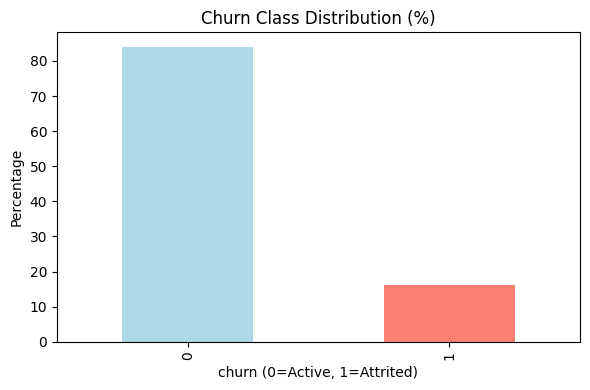

Churn distribution (%):
 churn
0    83.934038
1    16.065962
Name: proportion, dtype: float64


In [28]:

churn_counts = df['churn'].value_counts(normalize=True) * 100
plt.figure(figsize=(6,4))
churn_counts.plot(kind='bar', color=['lightblue','salmon'])
plt.title('Churn Class Distribution (%)')
plt.xlabel('churn (0=Active, 1=Attrited)')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()
print('Churn distribution (%):\n', churn_counts)



 The dataset is typically imbalanced (~16% churn). This imbalance will be addressed in modeling using class weights or SMOTE.


## 4) Demographics vs Churn

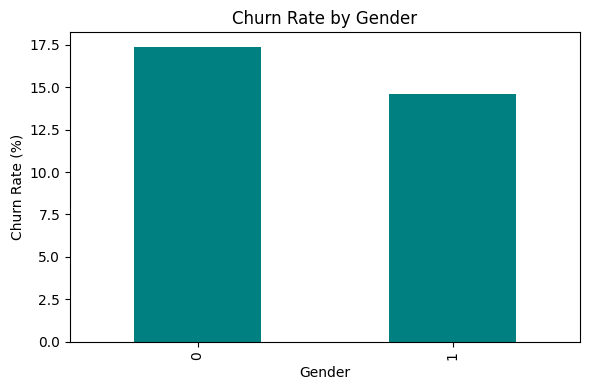

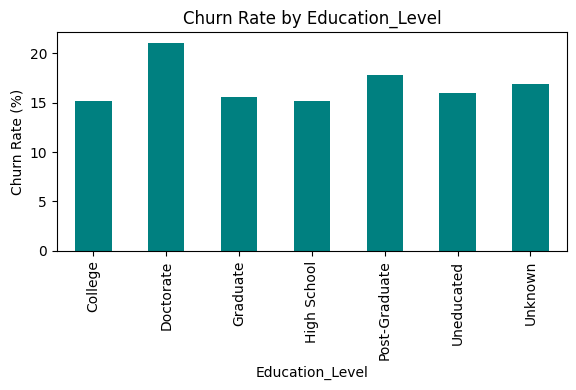

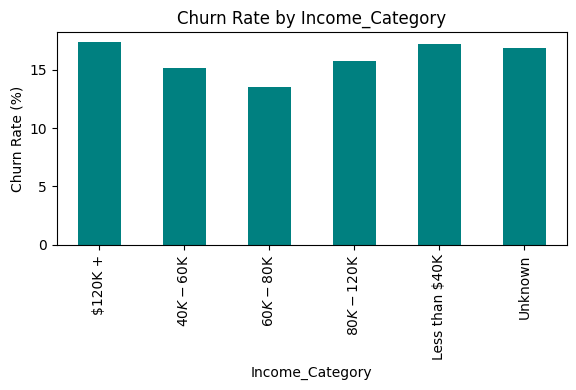

In [29]:

def churn_rate_by(col):
    if col in df.columns:
        rate = df.groupby(col)['churn'].mean() * 100
        rate.plot(kind='bar', figsize=(6,4), color='teal')
        plt.title(f'Churn Rate by {col}')
        plt.ylabel('Churn Rate (%)')
        plt.tight_layout()
        plt.show()

# Gender
if 'Gender' in df.columns:
    churn_rate_by('Gender')

#plot a charge that shows churn rate by education level
if 'Education_Level' in df.columns:
    churn_rate_by('Education_Level')
#plot a charge that shows churn rate by income category
if 'Income_Category' in df.columns:
    churn_rate_by('Income_Category')




- Gender differences are typically small but can reflect engagement habits.  
- Customers with lower income or education levels may show higher churn tendencies.


## 5) Financial Behavior vs Churn

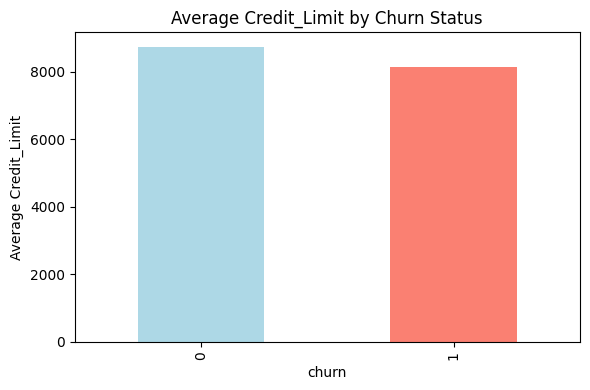

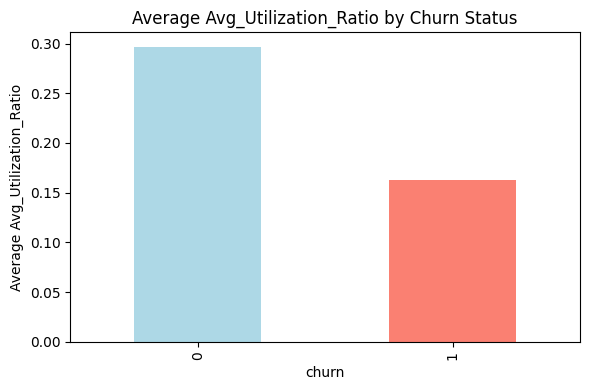

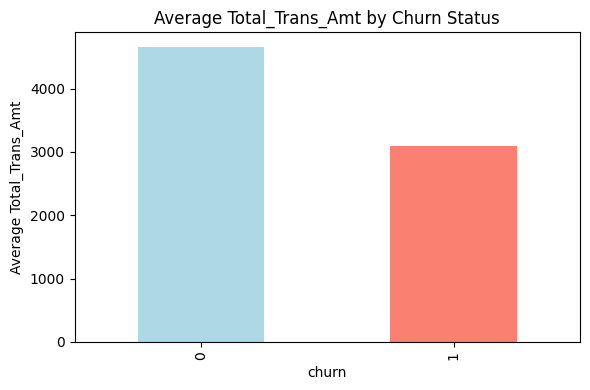

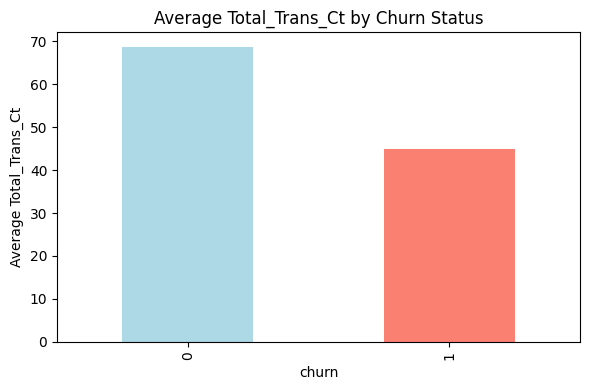

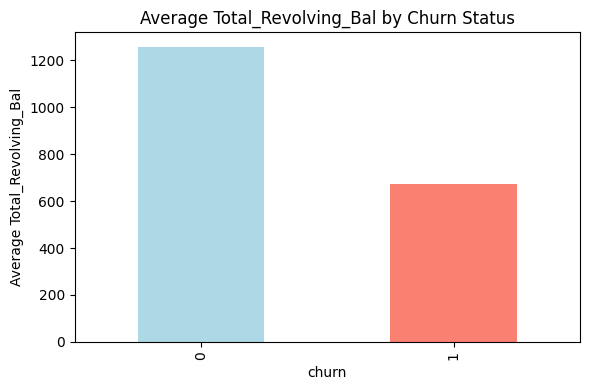

In [30]:

financial_vars = ['Credit_Limit','Avg_Utilization_Ratio','Total_Trans_Amt','Total_Trans_Ct','Total_Revolving_Bal']
for col in financial_vars:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        df.groupby('churn')[col].mean().plot(kind='bar', color=['lightblue','salmon'])
        plt.title(f'Average {col} by Churn Status')
        plt.ylabel(f'Average {col}')
        plt.tight_layout()
        plt.show()


Attrited customers often have lower transaction counts and utilization ratios, indicating disengagement or account dormancy.


## 6) Behavioral Engagement Indicators

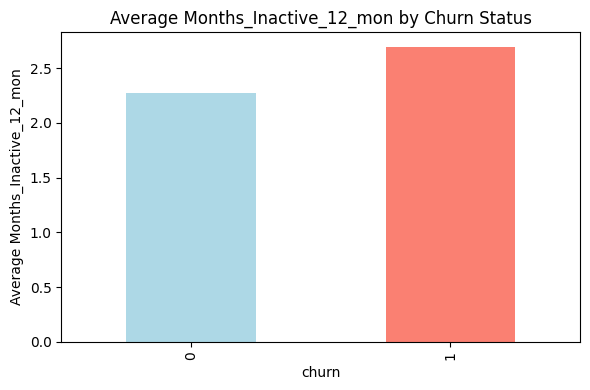

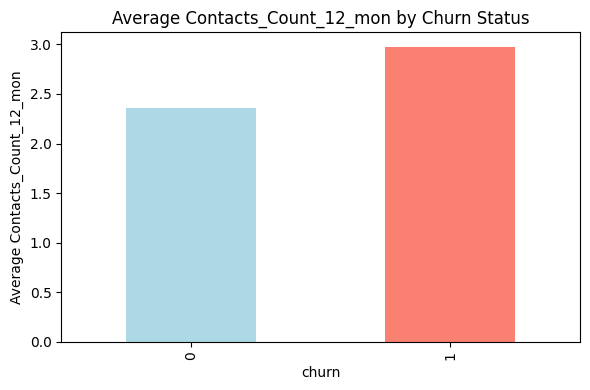

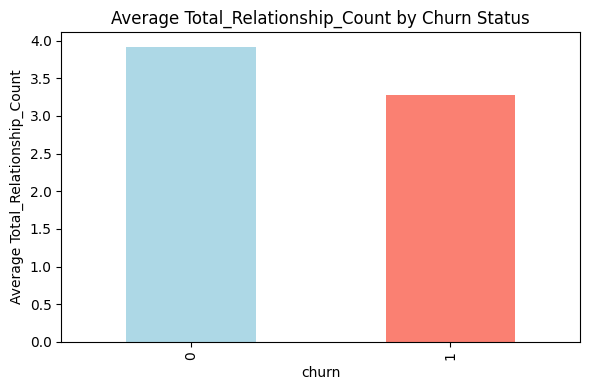

In [31]:

behavioral_cols = ['Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Relationship_Count']
for col in behavioral_cols:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        df.groupby('churn')[col].mean().plot(kind='bar', color=['lightblue','salmon'])
        plt.title(f'Average {col} by Churn Status')
        plt.ylabel(f'Average {col}')
        plt.tight_layout()
        plt.show()



- Customers who are inactive for many months or contact support frequently tend to churn more.  
- Total relationship count (number of products) is inversely correlated with churn — stronger engagement = retention.


## 7) Correlation Analysis

/var/folders/ny/4tw5tw4d54v19gln_91znxxr0000gn/T/ipykernel_81400/974152952.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


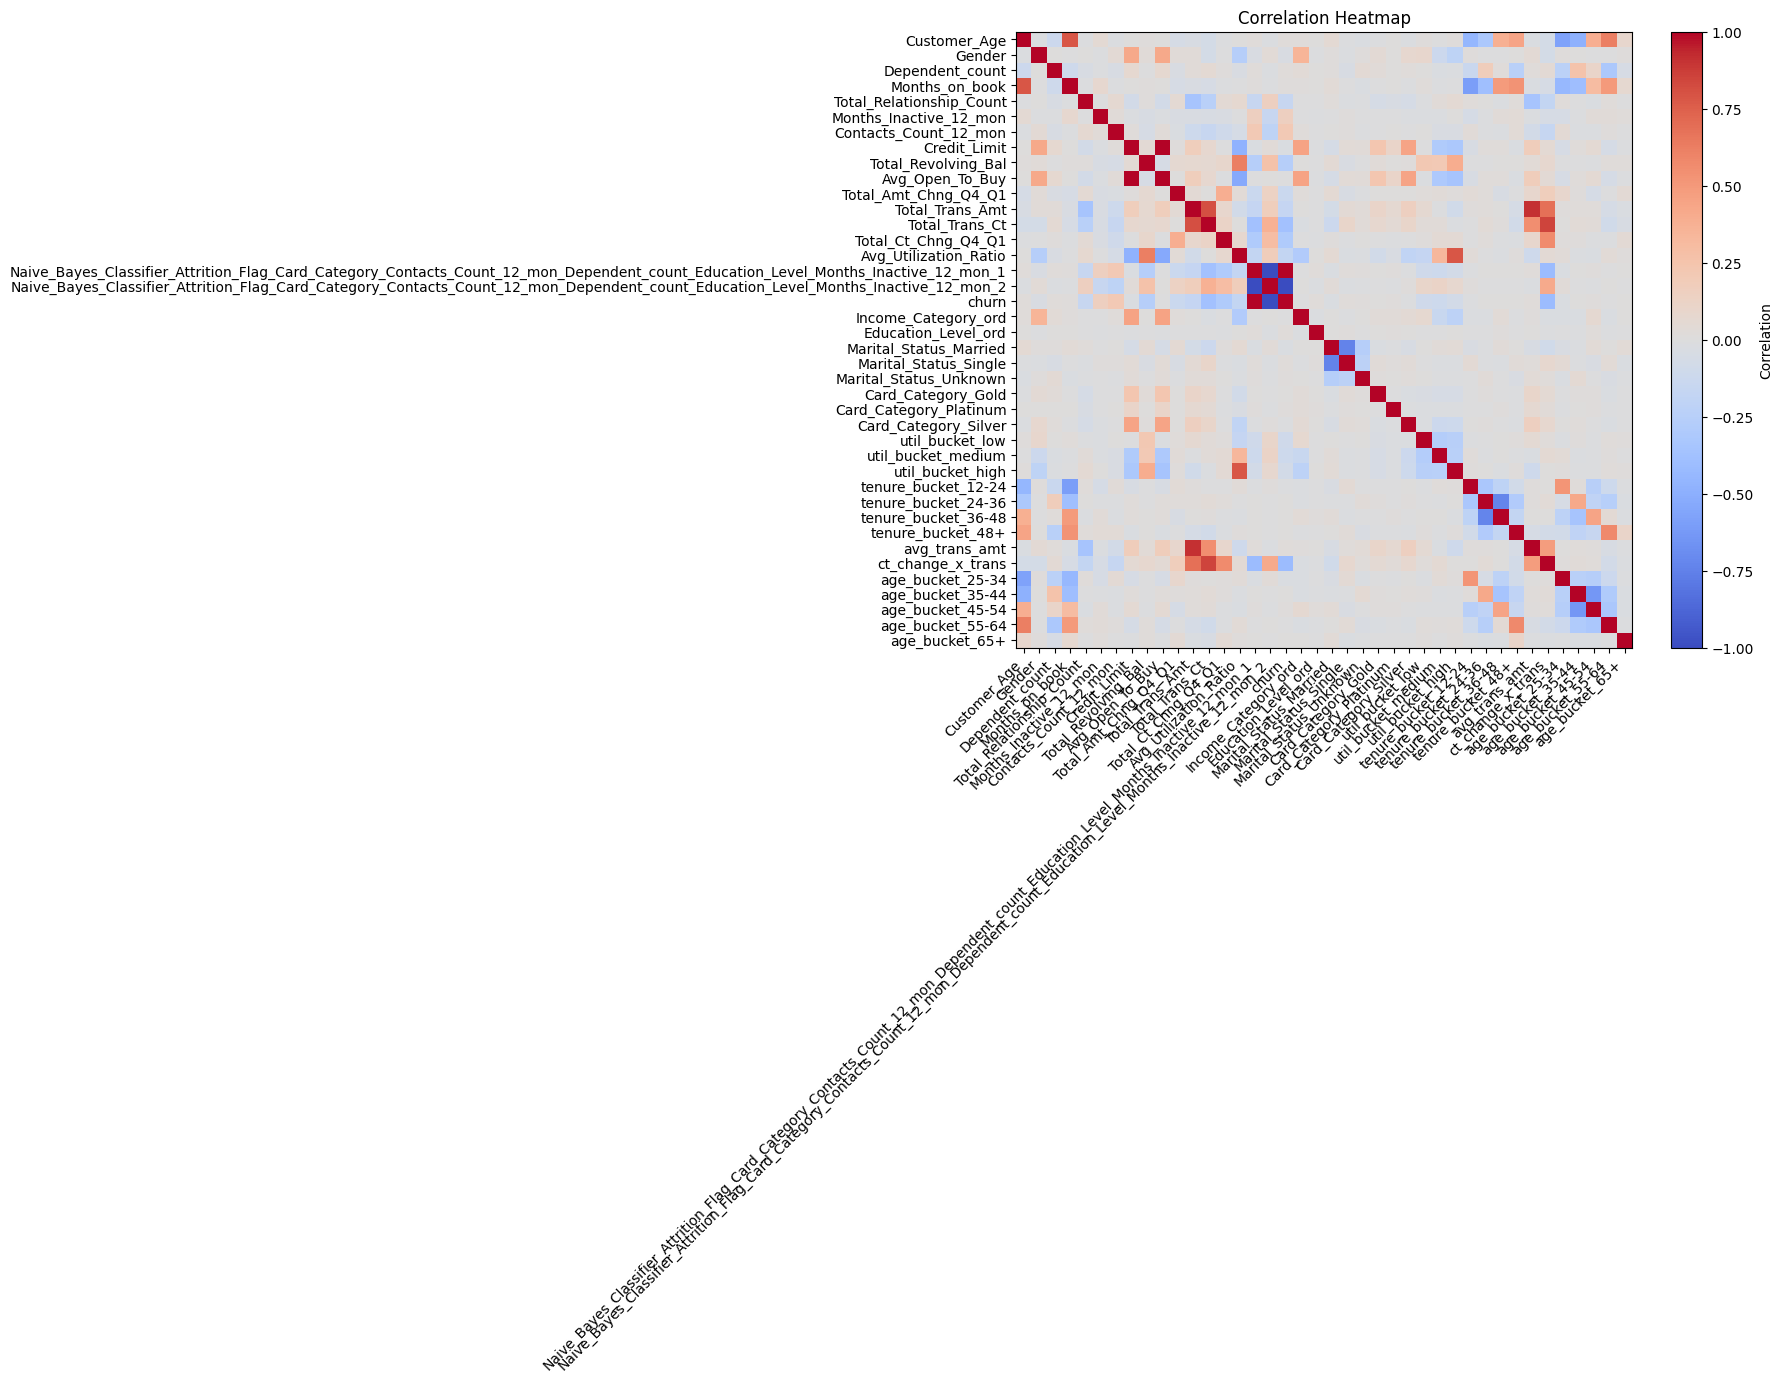

Top correlations with churn:
 churn                                                                                                                                 1.000000
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1    0.999989
Contacts_Count_12_mon                                                                                                                 0.204491
Months_Inactive_12_mon                                                                                                                0.152449
Education_Level_ord                                                                                                                   0.019545
Marital_Status_Single                                                                                                                 0.019037
Dependent_count                                                                                                 

In [32]:

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.title('Correlation Heatmap')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar(label='Correlation')
plt.tight_layout()
plt.show()

if 'churn' in corr.columns:
    corr_target = corr['churn'].sort_values(ascending=False)
    print('Top correlations with churn:\n', corr_target.head(15))



Positive correlations indicate features increasing churn probability; negative ones signal retention drivers.  
Strong signals typically include inactivity, contact frequency, and low transaction volume.



8) Summary Insights

Key Findings:
- Dataset shows class imbalance (~16% churn).  
- Inactivity and low engagement are major churn predictors.  
- Higher transaction activity and multiple products correlate with retention.

